In [84]:
import numpy as np
x=[-6.,-4.,-1.,0.,2.,4.]
#y=[0.]*9
y=[-6.,2.,-5.,-8.,-6.,12.]
h=[0.]*(len(x)-1)
a=[0.]*(len(x)-3)
b=[0.]*(len(x)-2)
c=[0.]*(len(x)-3)
d=[0.]*(len(x)-2)
p=[0.]*len(h)
q=[0.]*len(h)
m=[0.]*(len(x)-2)
m1=[0.]*len(x)
y1=[0.]*((len(x)-1)*2+1)
x1=[0.]*((len(x)-1)*2+1)

def S(x,x1,x2,y1,y2,h2,m1,m2):
    return m2*(x-x1)*(x-x1)*(x-x1)/6/h2+m1*(x2-x)*(x2-x)*(x2-x)/6/h2+(y2-m2*h2*h2/6)*(x-x1)/h2+(y1-m1*h2*h2/6)*(x2-x)/h2
    
for i in range(0, len(h)):
    h[i]=x[i+1]-x[i]
    
for j in range(0,len(x)-2):
    if (j!=0) and (j!=len(x)-3):
        a[j-1]=h[j]/6
        b[j]=(h[j]+h[j+1])/3
        c[j]=h[j+1]/6
        d[j]=(y[j+2]-y[j+1])/h[j+1]-(y[j+1]-y[j])/h[j]
    else:
        if j==0:
            b[j]=(h[j]+h[j+1])/3
            c[j]=h[j+1]/6
            d[j]=(y[j+2]-y[j+1])/h[j+1]-(y[j+1]-y[j])/h[j]
        else:
            a[j-1]=h[j]/6
            b[j]=(h[j]+h[j+1])/3
            d[j]=(y[j+2]-y[j+1])/h[j+1]-(y[j+1]-y[j])/h[j]

for i in range(1,len(h)):
    p[i]=-h[i]/(2*(h[i-1]+h[i])+p[i-1]*h[i-1])
    q[i]=(6*d[i-1]-h[i-1]*q[i-1])/(2*(h[i-1]+h[i])+p[i-1]*h[i-1])

m[len(m)-1]=q[len(m)]
for i in range(1,len(m)):
    m[len(m)-1-i]=p[len(m)-i]*m[len(m)-i]+q[len(m)-i]

for i in range(1,len(m1)-1):
    m1[i]=m[i-1]
count=0
print("Значения сплайнов в середине отрезка \n     x            y")

for i in range(0,len(x)-1):
    for j in range(0,2):
        if j!=0:
            x1[count]=(x[i]+x[i+1])/2*j
            y1[count]=S(x1[count],x[i],x[i+1],y[i],y[i+1],h[i],m1[i],m1[i+1])
            print("%.10f %.10f" % (x1[count],y1[count]))
        else:
            x1[count]=x[i]
            y1[count]=y[i]
        count+=1
x1[len(x1)-1]=x[len(y)-1]
y1[len(y1)-1]=y[len(y)-1]  
        

Значения сплайнов в середине отрезка 
     x            y
-5.0000000000 -0.9934296978
-2.5000000000 0.3405059133
-0.5000000000 -6.6749342970
1.0000000000 -8.8833771353
3.0000000000 1.6277923784


(-6.0000000000;-6.0000000000)
(-5.0000000000;-0.9934296978)
(-4.0000000000;2.0000000000)
(-2.5000000000;0.3405059133)
(-1.0000000000;-5.0000000000)
(-0.5000000000;-6.6749342970)
(0.0000000000;-8.0000000000)
(1.0000000000;-8.8833771353)
(2.0000000000;-6.0000000000)
(3.0000000000;1.6277923784)
(4.0000000000;12.0000000000)


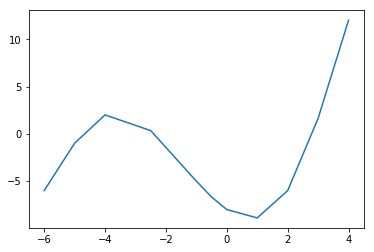

In [86]:
import matplotlib.pyplot as plt
for i in range(0,11):
    print("(%.10f;%.10f)" % (x1[i],y1[i]))
plt.plot(x1,y1)